In [1]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Data Science\Projects\Insurance Claim\insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


# EDA

In [3]:
df.shape

(1338, 8)

In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


**All variables have correct data type.**

In [6]:
df.isna().sum()/len(df)*100

age               0.0
sex               0.0
bmi               0.0
children          0.0
smoker            0.0
region            0.0
charges           0.0
insuranceclaim    0.0
dtype: float64

**Data contains no null values.**

In [7]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

**Duplicate value successfully removed.**

In [10]:
df.describe(percentiles=[0.49,0.99])

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,1.516081,13279.121487,0.584892
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656,0.492925
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
49%,39.000000,0.000000,30.200000,1.000000,0.000000,2.000000,9189.637840,1.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161300,1.000000
99%,64.000000,1.000000,46.411200,5.000000,1.000000,3.000000,48537.796878,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


**75% people has age between 18-51.**


**50% people only has 1 child and 25% people have 2 children.**


**Most of the people are non-smokers.**


**Most of teh people claims insurance.**

In [11]:
df.corr()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308,0.114748
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058044,0.030962
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.198401,0.384307
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.067389,-0.409189
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234,0.333701
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547,0.021193
charges,0.298308,0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000,0.310213
insuranceclaim,0.114748,0.030962,0.384307,-0.409189,0.333701,0.021193,0.310213,1.000000


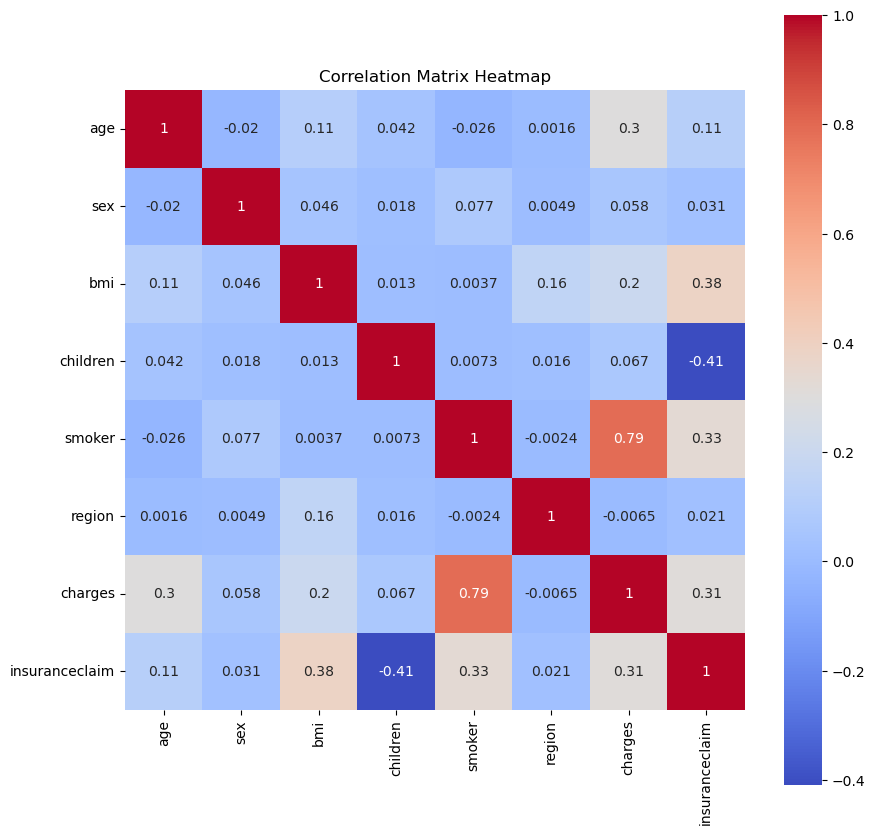

In [12]:
corr_matrix = df.corr()
plt.figure(figsize=(10,10)) #(width,height)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

**Only 1 pair of variables has slightly high positive correlation: Charges & Smokers. That means charges of insurance is high for people who smokes.**

* **Dataset has no null values.**


* **All variables has correct data type that means there is no suspicious value is present in any of the variable.**


* **There is only 1 duplicate value which I was removed.**

**Dataset is cleaned now for further analysis.**

# Feature Engineering

## Outlier Treatment

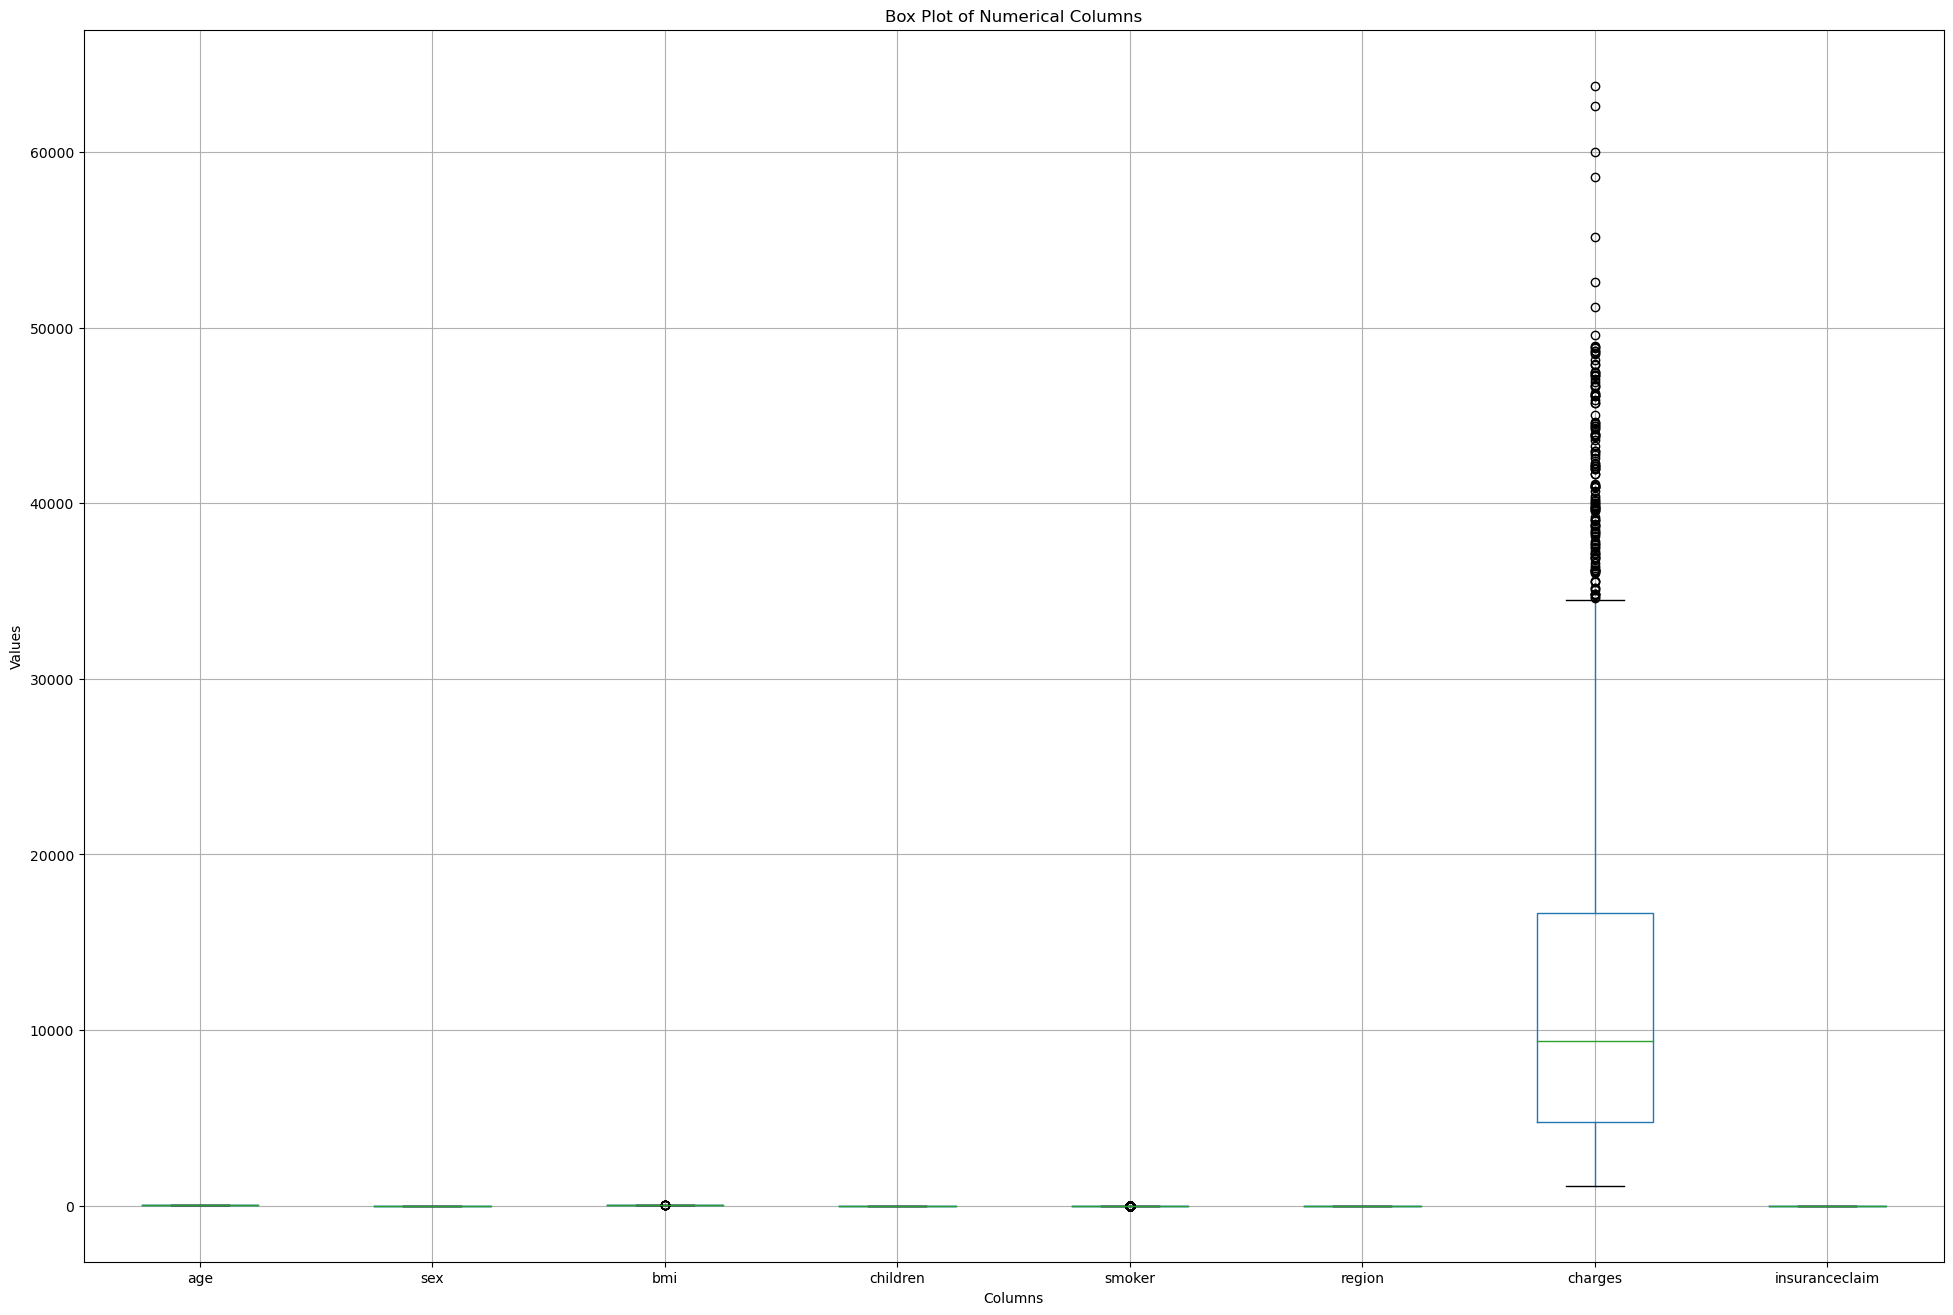

In [13]:
#checking the outliers of all numerical columns

plt.figure(figsize=(24, 16)) #(width,height)
df.boxplot()
plt.title('Box Plot of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

**Only 'Charges' variable have outliers, which is reasonable because insurance charges are not same for all people and in statistical summary I see that charges are high for persons who smokes.**


**Number of outliers are more, if I removed outliers by using IQR method than most of the data will be reduced. So, I decided to remove outliers with the help of Z-Score Method.**

## Treating Outliers: Z-Score Method

In [14]:
#create a variable for all interger and float variables

numerical_columns = df.select_dtypes(include=['number', 'float']).columns

In [15]:
#calculate Z-score of all values of all variables and a new dataframe of it

z_scores = pd.DataFrame()
for column in numerical_columns:
    z_scores[column] = np.abs((df[column] - df[column].mean()) / df[column].std())

z_scores.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,1.439879,1.009393,0.452990,0.908894,1.968924,1.342660,0.297745,0.842133
1,1.511082,0.989953,0.509231,0.079412,0.507512,0.437853,0.954024,0.842133
2,0.799051,0.989953,0.383011,1.579552,0.507512,0.437853,0.729100,1.186573
3,0.443036,0.989953,1.304564,0.908894,0.507512,0.466953,0.718835,1.186573
4,0.514239,0.989953,0.292347,0.908894,0.507512,0.466953,0.777208,0.842133


In [16]:
#Setting a threshold of 3 means that any value outside the range of -3 to +3 standard deviations is considered as outlier

threshold = 3
outlier_rows = z_scores[(z_scores > threshold).any(axis=1)]
outlier_rows

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
32,1.439879,1.009393,0.338245,3.238517,0.507512,1.342660,0.709419,1.186573
34,0.799051,0.989953,0.940346,0.079412,1.968924,1.342660,3.130827,0.842133
71,0.585442,0.989953,0.354637,3.238517,0.507512,1.371760,0.535051,1.186573
116,1.337042,0.989953,3.015596,0.908894,0.507512,0.437853,0.156708,0.842133
166,1.368676,1.009393,1.038699,3.238517,0.507512,1.342660,0.697625,1.186573
413,1.012660,0.989953,1.108677,3.238517,0.507512,1.342660,0.677026,1.186573
425,0.411402,0.989953,1.041469,3.238517,0.507512,0.437853,0.288204,1.186573
438,0.909823,1.009393,2.636937,3.238517,0.507512,0.437853,0.056694,0.842133
543,1.052229,1.009393,2.745125,0.908894,1.968924,0.437853,4.169266,0.842133
568,0.696214,1.009393,0.202697,3.238517,0.507512,1.342660,0.142541,1.186573


In [17]:
outlier_rows.shape

(29, 8)

**There are 29 outliers in data.**

In [18]:
#dropping outliers

df = df.drop(outlier_rows.index)

In [19]:
df.shape

(1308, 8)

**Approx 2% data is lost after removing outliers.**

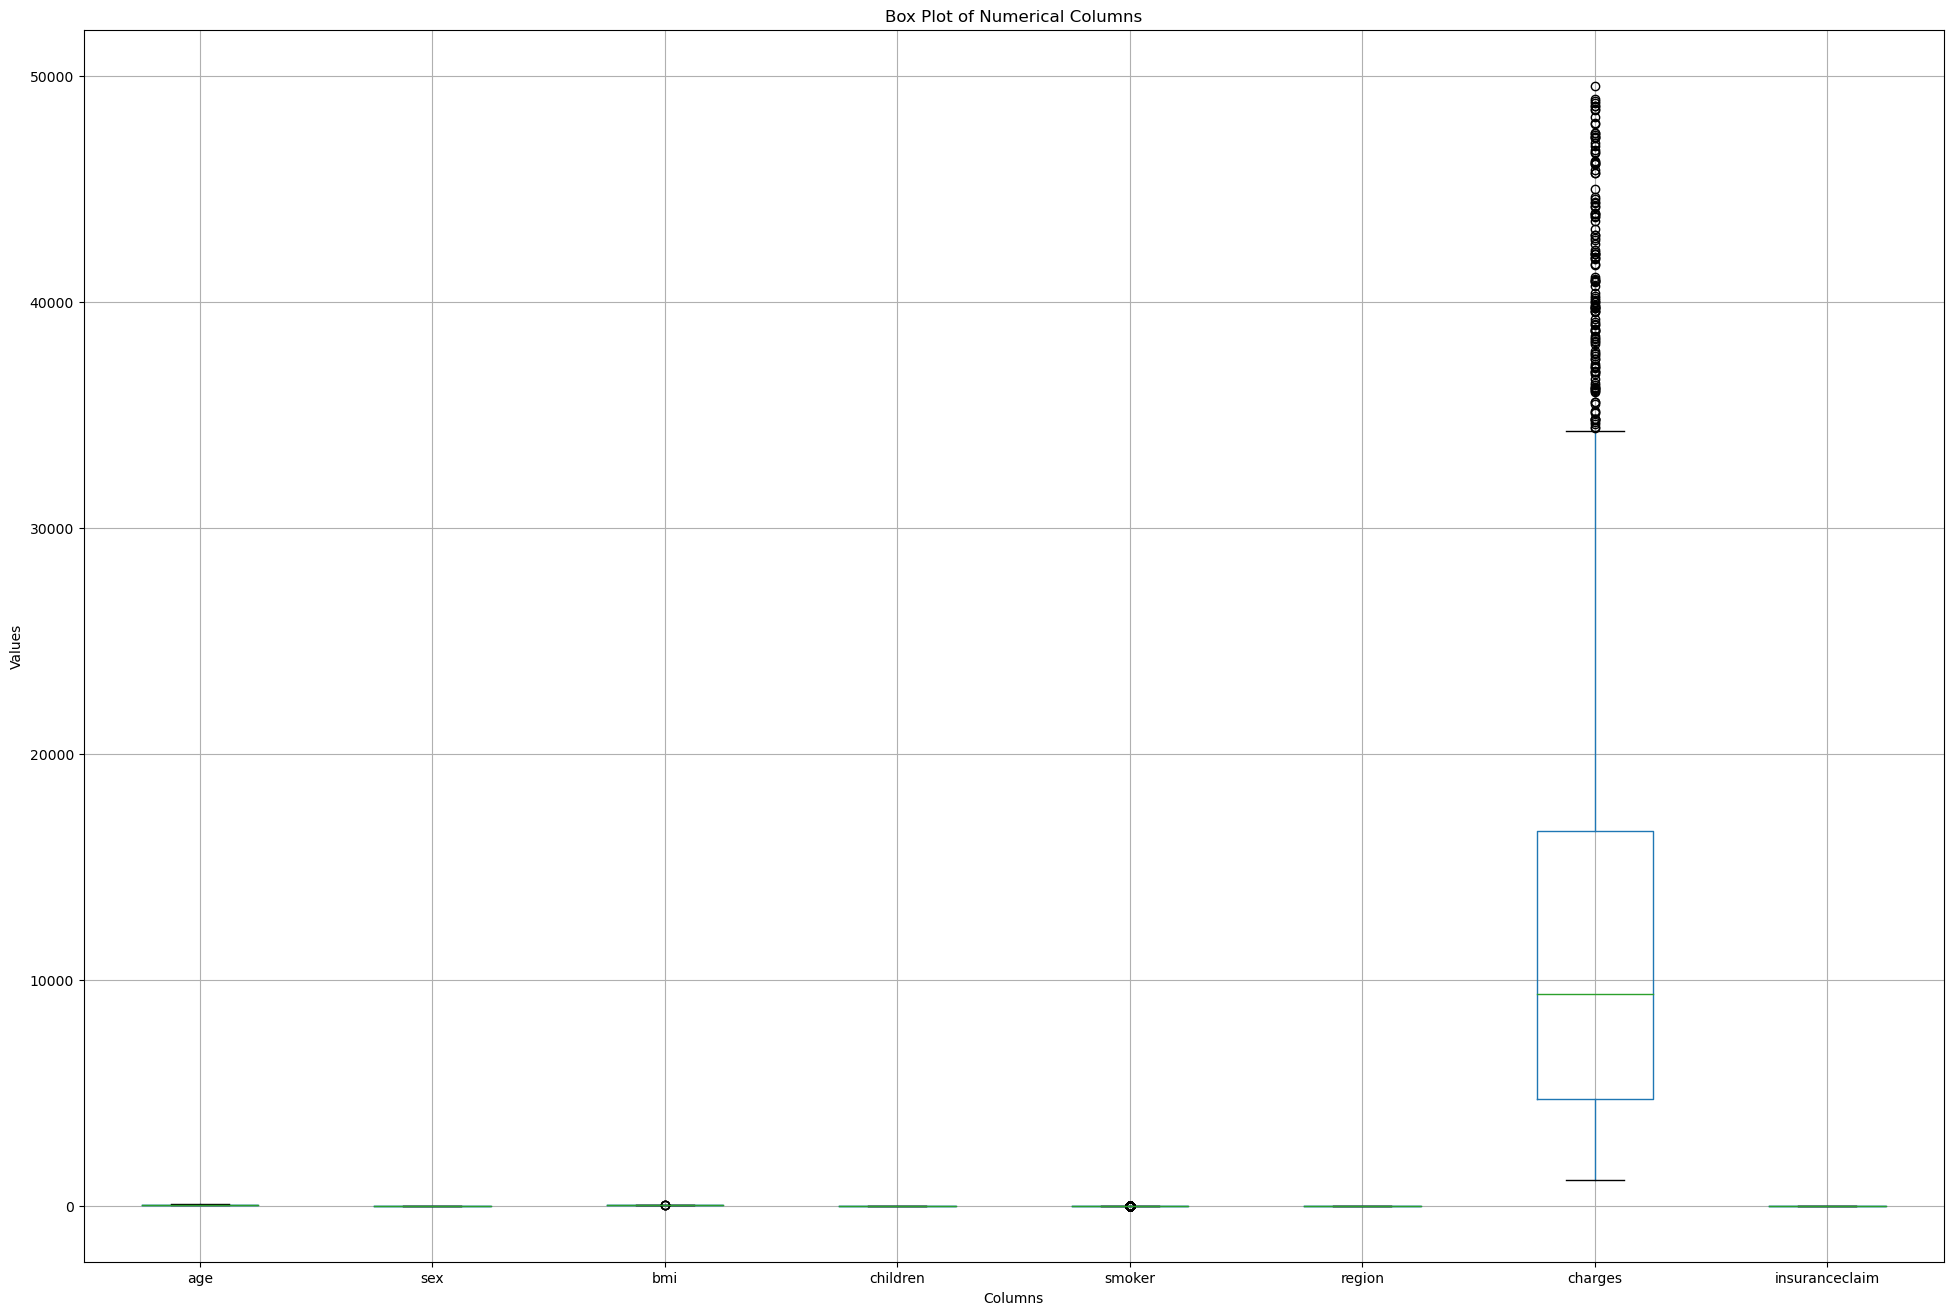

In [20]:
plt.figure(figsize=(24, 16)) #(width,height)
df.boxplot()
plt.title('Box Plot of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

**Outliers are successfully removed.**

### There is no need of Feature encoding because all variables are in numerical.

# Checking Distribution of Data

In [21]:
df.shape

(1308, 8)

In [22]:
# Select appropriate bin size using sturges_rule

import math

def sturges_rule(num_data_points):
    k = 1 + math.log2(num_data_points)
    return int(k)

# Example usage
num_data_points = 1308
bins = sturges_rule(num_data_points)
print("Number of bins according to Sturges' Rule:", bins)

Number of bins according to Sturges' Rule: 11


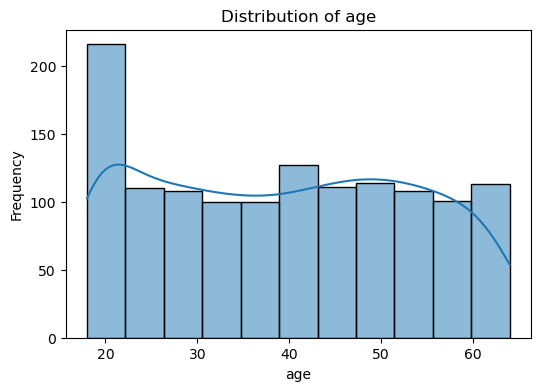

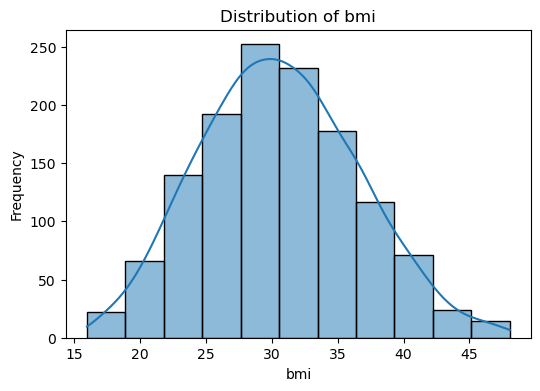

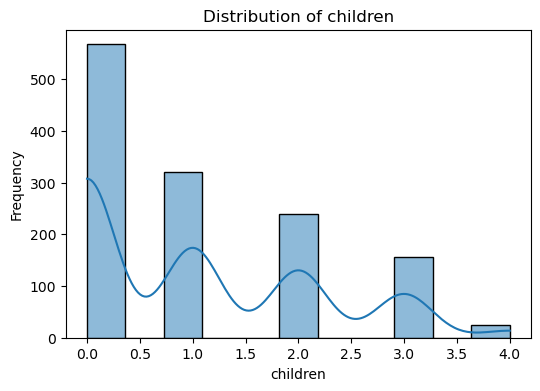

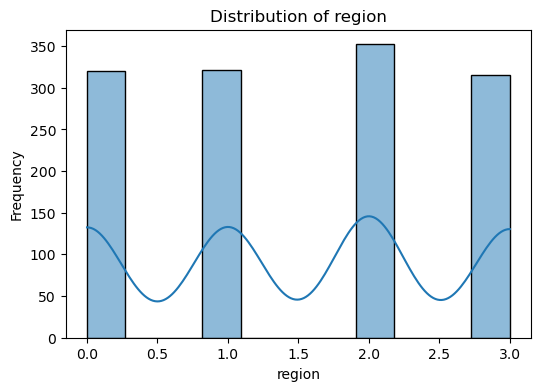

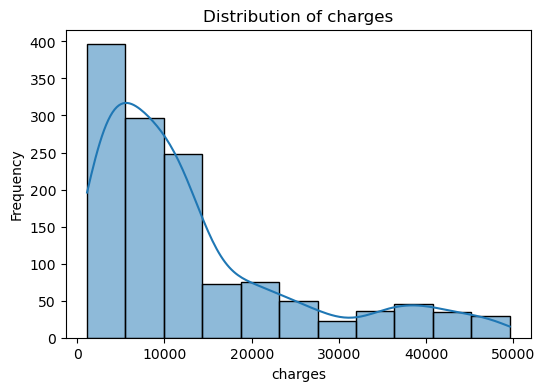

In [23]:
# check distribution of all continuous variables
continuous_vars = df.select_dtypes(include=['float64', 'int64']).columns

# Exclude binary variables from the list
binary_vars = [var for var in continuous_vars if df[var].nunique() == 2]

# Exclude binary variables from the continuous variables
continuous_vars = [var for var in continuous_vars if var not in binary_vars]

# Plot the distribution of each continuous variable
for var in continuous_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=var, bins=11, kde=True)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {var}')
    plt.show()

In [24]:
# check skewness of all continuous variables
df[continuous_vars].skew()

age         0.050421
bmi         0.191361
children    0.737050
region     -0.024001
charges     1.436653
dtype: float64

**Variables that are Approximately Symmetric (skewness between -0.5 and 0.5)**

age

bmi

region

**Variables that are moderate skewed (skewness between 0.5 to 1 or -0.5 to -1)**

children

**Variables that are highly skewed (skewness greater than 1 or less than -1)**

charge

**Most of the variables has approximately symmetric or moderate skewness, except charge variable, which is positively skewed. This is reasonable and logical because charges are only high for people who smokes, not for all people. Overall, the data appears to be suitable for further tasks such as feature engineering and model building.**

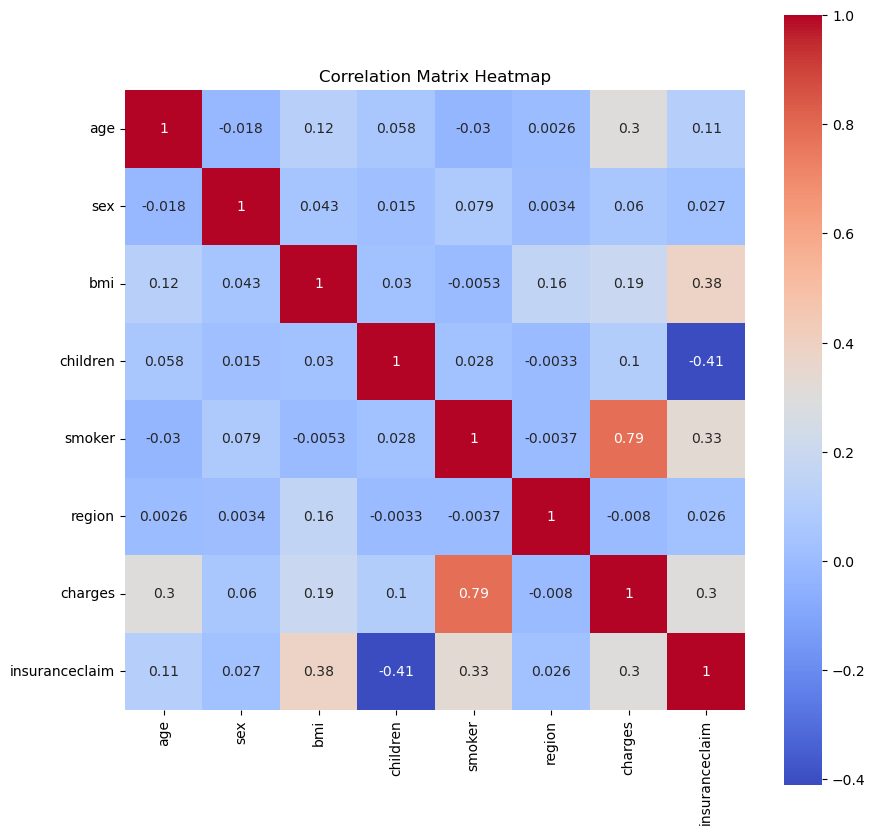

In [25]:
# Checking correlation between variables 

corr_matrix = df.corr()
plt.figure(figsize=(10,10)) #(width,height)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

**There is no highly correlated pair of variable to drop.**

# Diving data into train and test set

In [26]:
x = df.drop("insuranceclaim",axis=1)
y = df['insuranceclaim']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [28]:
X_train.shape, y_train.shape

((915, 7), (915,))

In [29]:
X_test.shape, y_test.shape

((393, 7), (393,))

# Feature Scaling

In [30]:
X_train.head()

,age,sex,bmi,children,smoker,region,charges
1239,25,0,42.13,1,0,2,3238.4357
1234,45,0,27.83,2,0,2,8515.7587
542,63,0,36.30,0,0,2,13887.2040
743,31,0,26.62,0,0,2,3757.8448
921,62,0,33.20,0,0,3,13462.5200


**Variables needs to be scale:-**

**age, bmi, children, region and charges**

**I decide to Min-Max Scle becuase out of 7 variables 2 variables have (0-1) range. Charge variables is not normally distributed and remaining variables have specifice range.**

In [31]:
#Applying standard scaler on train and test set

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

variables_to_scale = ['age','bmi', 'children', 'region', 'charges']

X_train[variables_to_scale] = scaler.fit_transform(X_train[variables_to_scale])

X_test[variables_to_scale] = scaler.transform(X_test[variables_to_scale])

X_train.head()

,age,sex,bmi,children,smoker,region,charges
1239,0.152174,0,0.815011,0.25,0,0.666667,0.043680
1234,0.586957,0,0.369667,0.50,0,0.666667,0.152590
542,0.978261,0,0.633448,0.00,0,0.666667,0.263443
743,0.282609,0,0.331984,0.00,0,0.666667,0.054400
921,0.956522,0,0.536904,0.00,0,1.000000,0.254678


In [32]:
X_test.head()

,age,sex,bmi,children,smoker,region,charges
1033,0.000000,1,0.174556,0.00,1,0.000000,0.260567
1069,0.782609,0,0.496419,0.25,0,0.666667,0.202390
708,0.282609,0,0.452663,0.75,0,0.000000,0.103008
749,0.217391,1,0.464497,0.00,0,0.333333,0.040050
736,0.413043,0,0.698536,0.00,1,0.666667,0.810990


**Scaling Successfully done**

# Check for the class imbalance

In [33]:
df['insuranceclaim'].value_counts()

1    767
0    541
Name: insuranceclaim, dtype: int64

In [34]:
y_train.value_counts()

1    526
0    389
Name: insuranceclaim, dtype: int64

<AxesSubplot:>

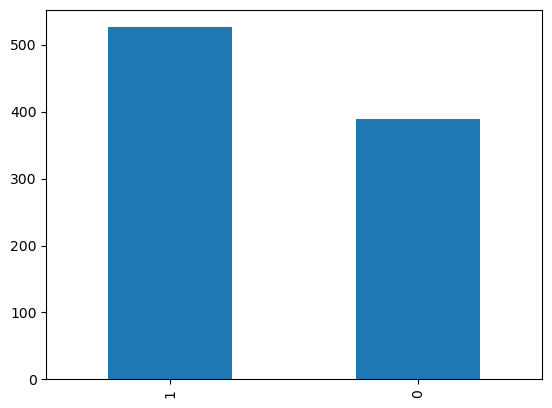

In [35]:
y_train.value_counts().plot(kind='bar')

In [36]:
#check the imbalance ratio

majority_count = 526
minority_count = 389

majority_ratio = majority_count / (minority_count + majority_count) * 100
minority_ratio = minority_count / (minority_count + majority_count) * 100

imbalance_ratio_str = f"{majority_ratio:.0f}:{minority_ratio:.0f}"
print(f"Imbalance Ratio: {imbalance_ratio_str}")

Imbalance Ratio: 57:43


**Dataset is almost balance and there is no need to apply class imbalancing techniques.**

# Feature Selection using Random Forest Feature Importance Method

In [37]:
#building random forest model for feature selection 

from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_jobs=-1, random_state=42)

rf_classifier.fit(X_train, y_train)

importances = rf_classifier.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

feature_importance_df

,Feature,Importance
0,bmi,0.371550
1,children,0.242133
2,charges,0.169531
3,age,0.097638
4,smoker,0.082022
5,region,0.027163
6,sex,0.009963


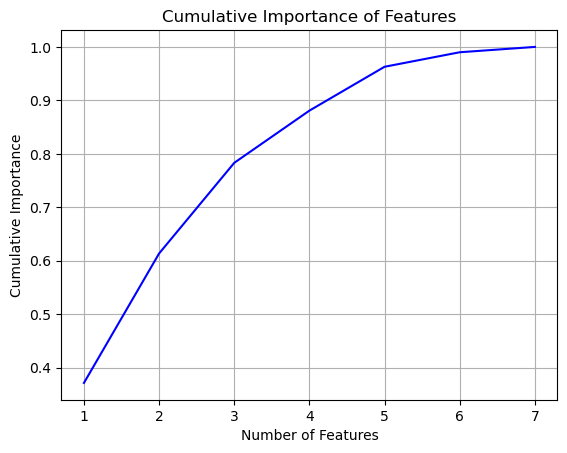

In [38]:
#check optimal number of features

sorted_indices = np.argsort(importances)[::-1]
cumulative_importance = np.cumsum(importances[sorted_indices])

plt.plot(range(1, len(importances) + 1), cumulative_importance, 'b-')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importance of Features')
plt.grid(True)
plt.show()

**All features are important for model building.**

# Check multi-colinearity between variables to avoid model from overfitting.

In [39]:
#checking multicolinearity of X_train

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variable"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)

vif

,Variable,VIF
6,charges,7.672881
2,bmi,4.791173
4,smoker,4.087760
0,age,3.861373
5,region,2.575473
1,sex,1.952012
3,children,1.767349


**Only Charges variable has VIF value more than 5 but I decide not to drop that variable because it is important variable for model building.**

# Model Building

In [40]:
#importing algorithms, metrics and time

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
import time
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score

In [41]:
# model building of multiple algorithms and check their evaulation metrics on training data along with their building time

algorithms = [
    LogisticRegression(n_jobs=-1, random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_jobs=-1),
    GaussianNB(),
    SVC(random_state=42),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(n_jobs=-1, random_state=42),
    XGBClassifier(n_jobs=-1, random_state=42)
]

# Initialize the results dictionary for training data
results_train = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Balanced Accuracy': [],
    'Building Time (s)': []
}

# Apply the algorithms and calculate performance metrics for training data
for algorithm in algorithms:
    start_time = time.time()  # Start timer

    algorithm_name = type(algorithm).__name__
    algorithm.fit(X_train, y_train)
    y_train_pred = algorithm.predict(X_train)

    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred)
    recall = recall_score(y_train, y_train_pred)
    f1 = f1_score(y_train, y_train_pred)
    balanced_accuracy = balanced_accuracy_score(y_train, y_train_pred)

    end_time = time.time()  # End timer
    building_time = end_time - start_time

    results_train['Algorithm'].append(algorithm_name)
    results_train['Accuracy'].append(accuracy)
    results_train['Precision'].append(precision)
    results_train['Recall'].append(recall)
    results_train['F1-score'].append(f1)
    results_train['Balanced Accuracy'].append(balanced_accuracy)
    results_train['Building Time (s)'].append(building_time)

# Create a dataframe for the training data results
df_train = pd.DataFrame(results_train)
df_train

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,Algorithm,Accuracy,Precision,Recall,F1-score,Balanced Accuracy,Building Time (s)
0,LogisticRegression,0.886339,0.892193,0.912548,0.902256,0.881724,3.058618
1,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,0.015577
2,KNeighborsClassifier,0.900546,0.915870,0.910646,0.913251,0.898768,0.046860
3,GaussianNB,0.722404,0.890805,0.589354,0.709382,0.745834,0.015626
4,SVC,0.900546,0.937626,0.885932,0.911046,0.903120,0.062481
5,AdaBoostClassifier,0.881967,0.898855,0.895437,0.897143,0.879595,0.093730
6,GradientBoostingClassifier,0.992350,0.994286,0.992395,0.993340,0.992342,0.124175
7,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,0.175645
8,XGBClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,0.102161


In [42]:
#check evaulation metrics on test data

results_test = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Balanced Accuracy': []
}

# Apply the algorithms and calculate performance metrics for test data
for algorithm in algorithms:
    algorithm_name = type(algorithm).__name__
    y_test_pred = algorithm.predict(X_test)

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)

    results_test['Algorithm'].append(algorithm_name)
    results_test['Balanced Accuracy'].append(balanced_accuracy)
    results_test['Accuracy'].append(accuracy)
    results_test['Precision'].append(precision)
    results_test['Recall'].append(recall)
    results_test['F1-score'].append(f1)
    

# Create a dataframe for the test data results
df_test = pd.DataFrame(results_test)
df_test

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,Algorithm,Accuracy,Precision,Recall,F1-score,Balanced Accuracy
0,LogisticRegression,0.885496,0.908333,0.904564,0.906445,0.879914
1,DecisionTreeClassifier,0.964377,0.967078,0.975104,0.971074,0.961236
2,KNeighborsClassifier,0.862595,0.901288,0.871369,0.886076,0.860027
3,GaussianNB,0.727735,0.935065,0.597510,0.729114,0.765860
4,SVC,0.885496,0.929825,0.879668,0.904051,0.887202
5,AdaBoostClassifier,0.842239,0.874477,0.867220,0.870833,0.834926
6,GradientBoostingClassifier,0.977099,1.000000,0.962656,0.980973,0.981328
7,RandomForestClassifier,0.964377,0.995633,0.946058,0.970213,0.969740
8,XGBClassifier,0.984733,0.995781,0.979253,0.987448,0.986337


**Decision Tree, Random Forest and XG Bosst overfits. Gradient Boost perform better among all and do not overfits, So, I decide to choose as a final model and work more on gradient boost to increase the performance of model.**

In [43]:
# Create the Gradient Boosting Classifier model seprately

gradient_boost_model = GradientBoostingClassifier(random_state=42)
gradient_boost_model = gradient_boost_model.fit(X_train, y_train)
gradient_boost_model

GradientBoostingClassifier(random_state=42)

In [44]:
#evaulate performance of model on trainning data

y_pred_train = gradient_boost_model.predict(X_train) >= 0.5

classification_train = classification_report(y_train, y_pred_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_score_train = f1_score(y_train, y_pred_train)
balanced_accuracy_train = balanced_accuracy_score(y_train, y_pred_train)

print("Classification Report - Training Data:")
print(classification_train)
print("Accuracy: {:.2f}".format(accuracy_train))
print("Precision: {:.2f}".format(precision_train))
print("Recall: {:.2f}".format(recall_train))
print("F1-score: {:.2f}".format(f1_score_train))
print("Balanced Accuracy: {:.2f}".format(balanced_accuracy_train))

Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       389
           1       0.99      0.99      0.99       526

    accuracy                           0.99       915
   macro avg       0.99      0.99      0.99       915
weighted avg       0.99      0.99      0.99       915

Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1-score: 0.99
Balanced Accuracy: 0.99


In [45]:
#evaulate performance of model on test data

y_pred_test = gradient_boost_model.predict(X_test) >= 0.5

classification_test = classification_report(y_test, y_pred_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_score_test = f1_score(y_test, y_pred_test)
balanced_accuracy_test = balanced_accuracy_score(y_test, y_pred_test)

print("Classification Report - Test Data:")
print(classification_test)
print("Accuracy: {:.2f}".format(accuracy_test))
print("Precision: {:.2f}".format(precision_test))
print("Recall: {:.2f}".format(recall_test))
print("F1-score: {:.2f}".format(f1_score_test))
print("Balanced Accuracy: {:.2f}".format(balanced_accuracy_test))

Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       152
           1       1.00      0.96      0.98       241

    accuracy                           0.98       393
   macro avg       0.97      0.98      0.98       393
weighted avg       0.98      0.98      0.98       393

Accuracy: 0.98
Precision: 1.00
Recall: 0.96
F1-score: 0.98
Balanced Accuracy: 0.98


# Hyperparameter Tunning

In [46]:
#importing GridSearchCV for hyperparameter tunning and define the parameters

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [47]:
#applying hyperparameter tunning

grid_search = GridSearchCV(gradient_boost_model, param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Get the best parameters and best model from the GridSearchCV
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Now the best_model is trained with the best hyperparameters and can be used for predictions.
# For example:
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Best hyperparameters: {best_params}")
print(f"Test accuracy with best model: {accuracy}")

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 250}
Test accuracy with best model: 0.9923664122137404


**Accuracy is increasing after applying hyperparameter tunning. So, I decide to make a seprate model by using these parameters.**

In [48]:
# Create the Gradient Boosting Classifier model seprately

gradient_boost_model1 = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 7, n_estimators= 250, random_state=42)
gradient_boost_model1 = gradient_boost_model.fit(X_train, y_train)
gradient_boost_model1

GradientBoostingClassifier(random_state=42)

### Evaulate model on tunned parameters

In [49]:
# Predictions on training data
y_train_pred = gradient_boost_model1.predict(X_train)

# Predictions on test data
y_test_pred = gradient_boost_model1.predict(X_test)

# Create the results dictionary for both training and test data
results = {
    'Data': ['Training', 'Test'],
    'Accuracy': [accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)],
    'Balanced Accuracy': [balanced_accuracy_score(y_train, y_train_pred), balanced_accuracy_score(y_test, y_test_pred)],
    'Precision': [precision_score(y_train, y_train_pred), precision_score(y_test, y_test_pred)],
    'Recall': [recall_score(y_train, y_train_pred), recall_score(y_test, y_test_pred)],
    'F1-score': [f1_score(y_train, y_train_pred), f1_score(y_test, y_test_pred)]
}


df_results = pd.DataFrame(results)
df_results

,Data,Accuracy,Balanced Accuracy,Precision,Recall,F1-score
0,Training,0.992350,0.992342,0.994286,0.992395,0.993340
1,Test,0.977099,0.981328,1.000000,0.962656,0.980973


**It appears that the model's accuracy has slightly increased.**

# Finding Optimal Threshold

In [50]:
#creating a dataframe of probabilites, actual labels, predicted labels for genral check

probabilities = gradient_boost_model1.predict_proba(X_train)

predicted_labels = gradient_boost_model1.predict(X_train)

results = pd.DataFrame({'Probability': probabilities[:, 1],
                        'Actual_Label': y_train,
                        'Predicted_Label': predicted_labels})

results.sample(10)

,Probability,Actual_Label,Predicted_Label
713,0.977109,1,1
681,0.016168,0,0
393,0.921940,1,1
1171,0.589437,0,1
879,0.032555,0,0
1209,0.948386,1,1
1135,0.683241,1,1
480,0.046057,0,0
636,0.006661,0,0
763,0.959821,1,1


In [51]:
#check evaulation metrics for different thresholds

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Creating an empty DataFrame to store the evaluation metrics
metrics_df = pd.DataFrame(columns=['Probability', 'Accuracy', 'Balanced Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Iterating over the probability thresholds
for threshold in thresholds:
    # Converting probabilities to predicted labels based on the threshold
    predicted_labels = (probabilities[:, 1] >= threshold).astype(int)

    # Calculating evaluation metrics
    accuracy = accuracy_score(y_train, predicted_labels)
    balanced_accuracy = balanced_accuracy_score(y_train, predicted_labels)
    precision = precision_score(y_train, predicted_labels, zero_division=1)
    recall = recall_score(y_train, predicted_labels, zero_division=1)
    f1 = f1_score(y_train, predicted_labels, zero_division=1)

    # Adding the metrics to the DataFrame
    metrics_df = pd.concat([metrics_df, pd.DataFrame({'Probability': [threshold],
                                                      'Accuracy': [accuracy],
                                                      'Balanced Accuracy': [balanced_accuracy],
                                                      'Precision': [precision],
                                                      'Recall': [recall],
                                                      'F1 Score': [f1]})], ignore_index=True)
metrics_df

,Probability,Accuracy,Balanced Accuracy,Precision,Recall,F1 Score
0,0.1,0.899454,0.881748,0.851133,1.000000,0.919580
1,0.2,0.945355,0.935733,0.913194,1.000000,0.954628
2,0.3,0.973770,0.969152,0.956364,1.000000,0.977695
3,0.4,0.992350,0.991672,0.990548,0.996198,0.993365
4,0.5,0.992350,0.992342,0.994286,0.992395,0.993340
5,0.6,0.989071,0.990494,1.000000,0.980989,0.990403
6,0.7,0.973770,0.977186,1.000000,0.954373,0.976654
7,0.8,0.950820,0.957224,1.000000,0.914449,0.955313
8,0.9,0.914754,0.925856,1.000000,0.851711,0.919918
9,1.0,0.425137,0.500000,1.000000,0.000000,0.000000


## Chek the Trade-Off Between Accuracy, Sensitivity, Specitivity, F-1 Score and Probabilities (Thresholds)

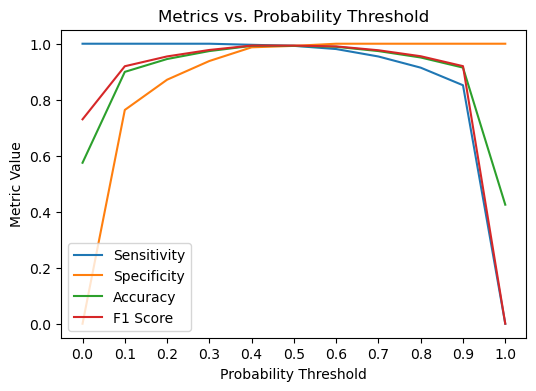

In [52]:
from sklearn.metrics import confusion_matrix

# Calculate predicted probabilities for the train data
train_probabilities = gradient_boost_model1.predict_proba(X_train)[:, 1]

# Apply different thresholds to obtain binary predictions for train data
thresholds = np.arange(0, 1.1, 0.1)
sensitivity = []
specificity = []
accuracy = []
f1_scores = []

for threshold in thresholds:
    train_predictions = (train_probabilities >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_train, train_predictions).ravel()
    sensitivity.append(tp / (tp + fn))
    specificity.append(tn / (tn + fp))
    accuracy.append((tp + tn) / (tp + tn + fp + fn))
    f1_scores.append(f1_score(y_train, train_predictions))

# Plot the sensitivity, specificity, accuracy, and F1 score against probability thresholds
plt.figure(figsize=(6,4))
plt.plot(thresholds, sensitivity, label='Sensitivity')
plt.plot(thresholds, specificity, label='Specificity')
plt.plot(thresholds, accuracy, label='Accuracy')
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.xlabel('Probability Threshold')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.ylabel('Metric Value')
plt.title('Metrics vs. Probability Threshold')
plt.legend(loc='lower left')
plt.show()

**It seems that by default 0.5 is correct threshold.**

# Evaulate model

In [53]:
# Predictions on training data
y_train_pred = gradient_boost_model1.predict(X_train)

# Predictions on test data
y_test_pred = gradient_boost_model1.predict(X_test)

# Create the results dictionary for both training and test data
results = {
    'Data': ['Training', 'Test'],
    'Accuracy': [accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)],
    'Balanced Accuracy': [balanced_accuracy_score(y_train, y_train_pred), balanced_accuracy_score(y_test, y_test_pred)],
    'Precision': [precision_score(y_train, y_train_pred), precision_score(y_test, y_test_pred)],
    'Recall': [recall_score(y_train, y_train_pred), recall_score(y_test, y_test_pred)],
    'F1-score': [f1_score(y_train, y_train_pred), f1_score(y_test, y_test_pred)]
}


df_results = pd.DataFrame(results)
df_results

,Data,Accuracy,Balanced Accuracy,Precision,Recall,F1-score
0,Training,0.992350,0.992342,0.994286,0.992395,0.993340
1,Test,0.977099,0.981328,1.000000,0.962656,0.980973


## Confusion Matrix

In [54]:
# Get predictions for training data
train_predictions = gradient_boost_model1.predict(X_train)

# Get predictions for test data (validation data)
test_predictions = gradient_boost_model1.predict(X_test)

# Calculate the confusion matrix for training data
confusion_train = confusion_matrix(y_train, train_predictions)

# Calculate the confusion matrix for test data (validation data)
confusion_test = confusion_matrix(y_test, test_predictions)

# Calculate the percentages for confusion matrix
total_train = confusion_train.sum()
total_test = confusion_test.sum()

true_positive_train = (confusion_train[1, 1] / total_train) * 100
true_negative_train = (confusion_train[0, 0] / total_train) * 100
false_positive_train = (confusion_train[0, 1] / total_train) * 100
false_negative_train = (confusion_train[1, 0] / total_train) * 100

true_positive_test = (confusion_test[1, 1] / total_test) * 100
true_negative_test = (confusion_test[0, 0] / total_test) * 100
false_positive_test = (confusion_test[0, 1] / total_test) * 100
false_negative_test = (confusion_test[1, 0] / total_test) * 100

# Create a DataFrame to display the results
results = {
    'Metric': ['True Positive (%)', 'True Negative (%)', 'False Positive (%)', 'False Negative (%)'],
    'Training Set': [true_positive_train, true_negative_train, false_positive_train, false_negative_train],
    'Test Set': [true_positive_test, true_negative_test, false_positive_test, false_negative_test]
}

df_results = pd.DataFrame(results)
df_results

,Metric,Training Set,Test Set
0,True Positive (%),57.049180,59.033079
1,True Negative (%),42.185792,38.676845
2,False Positive (%),0.327869,0.000000
3,False Negative (%),0.437158,2.290076


## ROC-AUC Curve
The ROC-AUC curve is typically plotted using the predictions and true labels on the test data. This allows us to evaluate the performance of the model on unseen data and assess its ability to generalize.

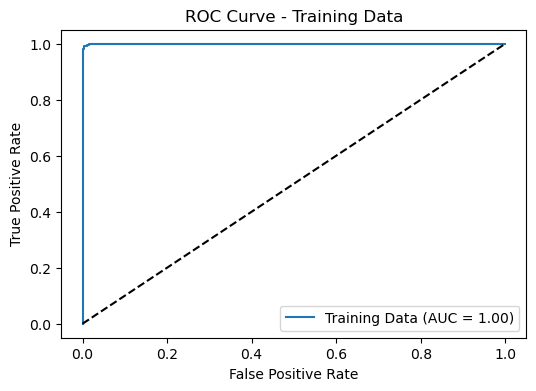

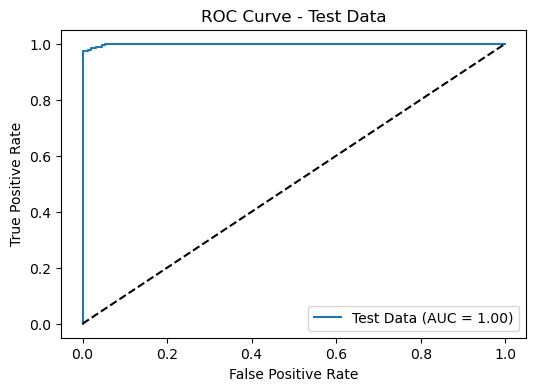

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for training data
train_probabilities = gradient_boost_model1.predict_proba(X_train)[:, 1]

# Get predicted probabilities for test data
test_probabilities = gradient_boost_model1.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for training data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_probabilities)
auc_train = roc_auc_score(y_train, train_probabilities)

# Calculate ROC curve and AUC for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_probabilities)
auc_test = roc_auc_score(y_test, test_probabilities)

# Plot ROC curve for training data
plt.figure(figsize=(6,4))
plt.plot(fpr_train, tpr_train, label=f'Training Data (AUC = {auc_train:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Training Data')
plt.legend(loc='lower right')

# Plot ROC curve for test data
plt.figure(figsize=(6,4))
plt.plot(fpr_test, tpr_test, label=f'Test Data (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Data')
plt.legend(loc='lower right')

# Display the plots
plt.show()

## Cross Validation

In [56]:
#cross validation of Accuracy

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gradient_boost_model1, X_train, y_train, cv=5, scoring='accuracy',n_jobs=-1)

print("Cross-Validation Scores:", scores)
print()
print("Mean Accuracy Score:", scores.mean())

Cross-Validation Scores: [0.96174863 0.94535519 0.94535519 0.9726776  0.97814208]

Mean Accuracy Score: 0.960655737704918


## Important features

In [57]:
feature_importance_df

,Feature,Importance
0,bmi,0.371550
1,children,0.242133
2,charges,0.169531
3,age,0.097638
4,smoker,0.082022
5,region,0.027163
6,sex,0.009963


**BMI, Children, and Charges represents around 78.32% of the variance in the target variable.**

# Save the model to a file

In [58]:
import joblib

model = gradient_boost_model1

joblib.dump(model, 'Insurance_Claim.pkl')

['Insurance_Claim.pkl']

# Model Building Report

### `Introduction`

In this model building project, the goal was to develop a classification model to predict insurance claim outcomes based on various features. We trained and evaluated multiple classification algorithms using training and test datasets. The report provides a comprehensive overview of the model building process, performance evaluation, and the final selected model.

### `Data Overview`

The dataset contains 1338 observations and 8 variables, with no missing values and correct data types. After removing one duplicate observation, the data was ready for further analysis.

### `Exploratory Data Analysis (EDA)`
EDA revealed several insights about the dataset:

* Most people's ages fall between 18 and 51 years.


* About 50% of people have one child, and 25% have two children.


* The majority of people are non-smokers and have claimed insurance.


* The correlation analysis indicated a slightly high positive correlation between 'Charges' and 'Smoker', indicating higher insurance charges for smokers.


* Outliers were detected using the Z-Score method, and 29 outliers were removed, accounting for approximately 2% data loss.


### `Model Selection`

We trained various classification algorithms on the training data and evaluated their performance on both training and test sets. Among the models, the Gradient Boosting Classifier exhibited the best performance without overfitting, making it the final chosen model.

### `Hyperparameter Tuning`

We performed hyperparameter tuning on the selected Gradient Boosting model to optimize its performance. The best model achieved an impressive test accuracy of 0.9924.

### `Model Evaluation`

The final Gradient Boosting Classifier was evaluated on both the training and test datasets:

**Evaluation Metrics on Training & Test Data:**

|Metric|Training Data|Test Data|
|--------|---------|--------|
|Accuracy|0.9924| 0.9771|
|Precision| 0.9943|1.0000|
|Recall| 0.9924|0.9627|
|F1-score| 0.9933|0.9809|
|Balanced Accuracy| 0.9923|0.9813|


The model demonstrated excellent performance on both datasets, with high accuracy, precision, recall, and F1-score. The balanced accuracy showed that the model effectively classified both classes without bias.

### `Threshold Selection`
Default threshold (0.5) was found to be suitable for the model.

### `Confusion Matrix`
The confusion matrix results on the training set and test set:

|Elements|Training Data|Test Data| 
|---------|-------------|----|
|True Positive| 57.05%|59.03%|
|True Negative|42.19%|38.68%|
|False Positive| 0.33%|0.00%|
|False Negative| 0.44%|2.29%|

### `ROC-AUC Curve`

The ROC-AUC curve for both training and test data resulted in an AUC of 1.00, indicating excellent model performance in distinguishing between the classes.

### `Cross-Validation`
Cross-validation was performed, and the model achieved consistent F1 scores of approximately 0.96 on average, indicating robust and reliable performance.

### `Feature Importance`
Feature Importance analysis revealed that 'BMI', 'Children', and 'Charges' are the most significant variables, contributing to around 78.32% of the variance in the target variable.

### `Conclusion`
The Gradient Boosting Classifier proved to be the best model for the insurance claim prediction task, demonstrating outstanding performance on both training and test datasets. Its ability to generalize and handle class imbalances makes it a reliable model for real-world predictions. The feature importance analysis provided valuable insights into the factors influencing insurance claim outcomes. The saved model will be useful for making predictions on new data in the future.